E:\Anaconda\envs\py3.8\lib\site-packages\mmcv\__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


Test 1: Normal Gaussian


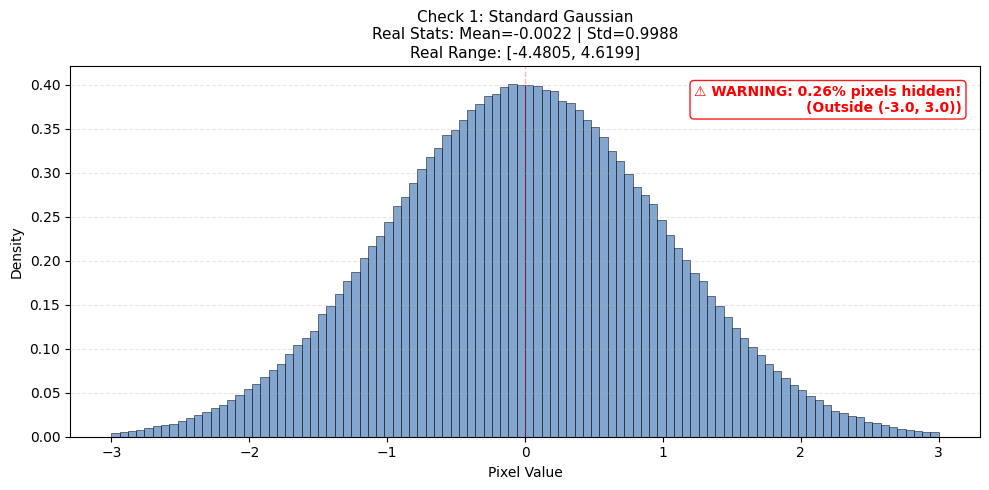

Test 2: Shifted Distribution (Expect Warning)


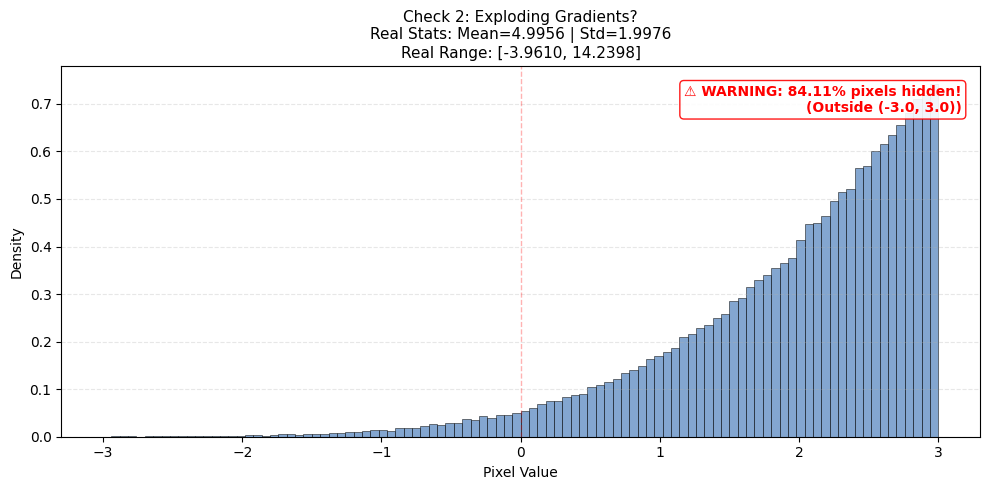

In [1]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt

from utils.yaml_utils import plot_tensor_hist

# 模拟一个 BCHW Tensor (GPU上, 带梯度)
# 假设这是一个标准的正态分布噪声
dummy_tensor = torch.randn(4, 3, 256, 256).cuda() # 假设你在有GPU的环境，没有就去掉.cuda()
dummy_tensor.requires_grad = True

# 1. 正常情况：查看 [-3, 3] 范围
print("Test 1: Normal Gaussian")
plot_tensor_hist(dummy_tensor, range_lim=(-3.0, 3.0), title="Check 1: Standard Gaussian")

# 2. 异常情况：模拟数据漂移和扩散（例如 SDE 发散了）
# 均值偏移到 5，且方差变大
bad_tensor = dummy_tensor * 2.0 + 5.0 

print("Test 2: Shifted Distribution (Expect Warning)")
# 我们依然想在 [-3, 3] 范围看它，结果应该是大部分数据都在外面，触发警告
plot_tensor_hist(bad_tensor, range_lim=(-3.0, 3.0), title="Check 2: Exploding Gradients?")